# Notebook to filter unique DOIs from all search queries and find publisher prefixes

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import requests
import json
import time
from collections import Counter
import os

## Analysis of results with sem scholar search with query specifiying only journal articles
Created list of unique DOIs and found top publishers

In [3]:
path = '/Users/pnt17/Library/CloudStorage/OneDrive-ImperialCollegeLondon/MRes_project_data/doi_sem_scholar/'
filenames = ['cdots_hydro', 'cdots_solvo', 'cnano_hydro', 'cpd_hydro', 'cqd_hydro', 'gqd_hydro']
years = list(range(2005, 2024, 1))
doi_list = []
for filename in filenames:
    for year in years:
        with open(path+filename+'/'+'doi_'+str(year)+'.txt', 'r') as f:
            dois = f.read().splitlines()
            doi_list.extend(dois)

print(len(doi_list))

6153


In [4]:
doi_unique = list(set(doi_list))
print(len(doi_unique))

3396


In [19]:
# with open(path+'dois_sem_sch.txt', 'a', encoding='utf-8') as save_file:
#     for doi in doi_unique:
#         save_file.write(doi + '\n')

In [5]:
pub_prefix = []
for doi in doi_unique:
    prefix = re.split('/', doi)[0]
    pub_prefix.append(prefix)
print(len(pub_prefix))

3396


In [6]:
pub_prefix_unique = list(set(pub_prefix))
print(len(pub_prefix_unique))

56


In [7]:
print(pub_prefix_unique)

['10.2166', '10.2147', '10.4274', '10.1002', '10.2174', '10.1088', '10.1096', '10.1039', '10.33774', '10.22038', '10.1107', '10.1007', '10.1103', '10.1038', '10.1073', '10.1021', '10.1134', '10.34133', '10.2217', '10.3791', '10.1126', '10.3906', '10.1166', '10.14715', '10.1049', '10.1098', '10.38212', '10.13227', '10.1104', '10.1364', '10.1177', '10.5812', '10.1128', '10.3390', '10.1101', '10.3389', '10.1080', '10.2533', '10.1248', '10.1093', '10.2139', '10.15171', '10.2116', '10.1371', '10.17344', '10.1016', '10.1111', '10.1089', '10.22037', '10.3762', '10.1155', '10.17179', '10.1109', '10.1260', '10.3724', '10.1186']


In [7]:
def prefix_finder(prefix):
    url = 'https://api.crossref.org/prefixes/' + str(prefix)
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        prefix_dict = {str(prefix):data['message']['name']}
        return prefix_dict
    elif response.status_code == 404:
        prefix_dict = {str(prefix):'Prefix not found'}
        return prefix_dict

In [66]:
prefix_names = {}
for prefix in pub_prefix_unique:
    prefix_names.update(prefix_finder(prefix))
    time.sleep(0.3)
print(len(prefix_names))

56


In [67]:
print(prefix_names)

{'10.2166': 'IWA Publishing', '10.2147': 'Informa UK Limited', '10.4274': 'Galenos Yayinevi', '10.1002': 'Wiley', '10.2174': 'Bentham Science Publishers Ltd.', '10.1088': 'IOP Publishing', '10.1096': 'Wiley', '10.1039': 'Royal Society of Chemistry (RSC)', '10.33774': 'Cambridge University Press (CUP)', '10.22038': 'Prefix not found', '10.1107': 'International Union of Crystallography (IUCr)', '10.1007': 'Springer Science and Business Media LLC', '10.1103': 'American Physical Society (APS)', '10.1038': 'Springer Science and Business Media LLC', '10.1073': 'Proceedings of the National Academy of Sciences', '10.1021': 'American Chemical Society (ACS)', '10.1134': 'Pleiades Publishing Ltd', '10.34133': 'American Association for the Advancement of Science (AAAS)', '10.2217': 'Future Medicine Ltd', '10.3791': 'MyJove Corporation', '10.1126': 'American Association for the Advancement of Science (AAAS)', '10.3906': 'The Scientific and Technological Research Council of Turkey (TUBITAK-ULAKBIM)'

In [68]:
prefix_count = Counter(pub_prefix)
print(len(prefix_count))

56


In [76]:
prefix_count = dict(prefix_count)
print(prefix_count)

{'10.1039': 841, '10.1002': 418, '10.1007': 332, '10.1088': 112, '10.1021': 660, '10.3390': 372, '10.3389': 43, '10.1186': 53, '10.2166': 4, '10.1038': 114, '10.1098': 14, '10.1016': 169, '10.1111': 13, '10.1166': 95, '10.1126': 9, '10.2139': 7, '10.2174': 17, '10.1155': 9, '10.1080': 11, '10.1364': 6, '10.3762': 13, '10.1177': 12, '10.1248': 1, '10.2147': 14, '10.1107': 1, '10.1128': 2, '10.2116': 9, '10.1073': 5, '10.1049': 2, '10.33774': 1, '10.34133': 1, '10.3724': 3, '10.2533': 1, '10.2217': 3, '10.1093': 2, '10.1109': 1, '10.1260': 2, '10.17344': 2, '10.4274': 1, '10.1371': 3, '10.5812': 1, '10.1104': 1, '10.15171': 1, '10.3906': 1, '10.1101': 1, '10.14715': 1, '10.1089': 1, '10.3791': 1, '10.38212': 3, '10.17179': 1, '10.1103': 1, '10.1134': 1, '10.1096': 1, '10.22037': 1, '10.22038': 1, '10.13227': 1}


In [80]:
df = pd.DataFrame(prefix_names.items(), columns = ['prefix', 'publisher'])
df['Results No.'] = df['prefix'].map(prefix_count)
df
# df.to_csv(path+'pub_prefix.csv', index=False)

,prefix,publisher,Results No.
0,10.2166,IWA Publishing,4
1,10.2147,Informa UK Limited,14
2,10.4274,Galenos Yayinevi,1
3,10.1002,Wiley,418
4,10.2174,Bentham Science Publishers Ltd.,17
5,10.1088,IOP Publishing,112
6,10.1096,Wiley,1
7,10.1039,Royal Society of Chemistry (RSC),841
8,10.33774,Cambridge University Press (CUP),1
9,10.22038,Prefix not found,1


In [82]:
not_found = df[df['publisher'] == 'Prefix not found']
print(not_found)

      prefix         publisher  Results No.
9   10.22038  Prefix not found            1
27  10.13227  Prefix not found            1
48  10.22037  Prefix not found            1
51  10.17179  Prefix not found            1


In [101]:
sorted_df  = df.sort_values('Results No.', ascending = False)
sorted_df

,prefix,publisher,Results No.
7,10.1039,Royal Society of Chemistry (RSC),841
15,10.1021,American Chemical Society (ACS),660
3,10.1002,Wiley,418
33,10.3390,MDPI AG,372
11,10.1007,Springer Science and Business Media LLC,332
45,10.1016,Elsevier BV,169
13,10.1038,Springer Science and Business Media LLC,114
5,10.1088,IOP Publishing,112
22,10.1166,American Scientific Publishers,95
55,10.1186,Springer Science and Business Media LLC,53


<AxesSubplot:xlabel='prefix'>

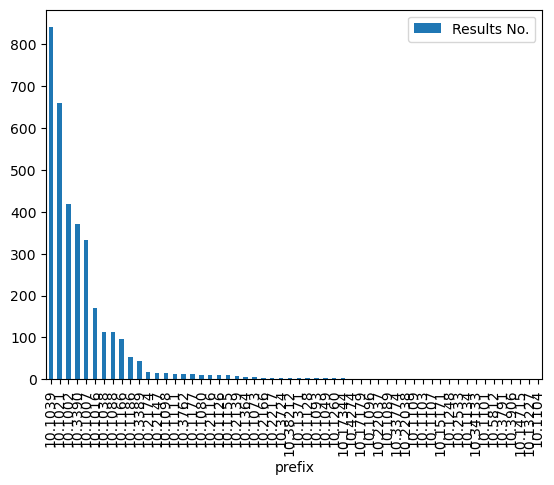

In [102]:
sorted_df.plot.bar('prefix', 'Results No.')

In [90]:
top_11 = df.sort_values('Results No.', ascending = False).head(11)
top_11

,prefix,publisher,Results No.
7,10.1039,Royal Society of Chemistry (RSC),841
15,10.1021,American Chemical Society (ACS),660
3,10.1002,Wiley,418
33,10.3390,MDPI AG,372
11,10.1007,Springer Science and Business Media LLC,332
45,10.1016,Elsevier BV,169
13,10.1038,Springer Science and Business Media LLC,114
5,10.1088,IOP Publishing,112
22,10.1166,American Scientific Publishers,95
55,10.1186,Springer Science and Business Media LLC,53


In [91]:
results = top_11['Results No.'].sum()
print(results)

3209


In [98]:
print(results - top_11.loc[top_11['prefix'] == '10.1166', 'Results No.'].iloc[0])

3114


## Analysis of results from sem scholar with search query not specifying publication type

In [2]:
path = '/Users/pnt17/Library/CloudStorage/OneDrive-ImperialCollegeLondon/MRes_project_data/doi_sem_scholar_2/'
with open(path+'doi_unique.txt', 'r') as file:
    dois_unique = file.read().splitlines()

In [3]:
print(len(dois_unique))

8702


In [4]:
pub_prefix = []
for doi in dois_unique:
    prefix = re.split('/', doi)[0]
    pub_prefix.append(prefix)
print(len(pub_prefix))

8702


In [5]:
pub_prefix_unique = list(set(pub_prefix))
print(len(pub_prefix_unique))

362


In [6]:
print(pub_prefix_unique)

['10.4150', '10.31489', '10.2478', '10.15294', '10.3233', '10.21580', '10.3390', '10.2991', '10.36348', '10.14233', '10.22037', '10.31002', '10.6023', '10.3762', '10.3795', '10.14716', '10.14203', '10.5796', '10.5281', '10.37904', '10.24200', '10.22038', '10.15666', '10.1260', '10.1186', '10.3788', '10.5185', '10.7536', '10.17509', '10.7508', '10.1149', '10.15373', '10.17516', '10.6084', '10.1107', '10.56053', '10.15328', '10.5897', '10.3807', '10.30955', '10.20961', '10.5220', '10.4067', '10.7567', '10.1680', '10.33961', '10.3303', '10.2109', '10.17632', '10.11895', '10.9729', '10.11901', '10.2320', '10.1126', '10.20868', '10.15376', '10.20944', '10.1134', '10.24252', '10.54097', '10.3866', '10.13023', '10.1016', '10.2524', '10.1038', '10.2166', '10.24996', '10.14715', '10.1007', '10.1002', '10.20964', '10.5012', '10.2351', '10.2139', '10.15226', '10.2113', '10.14710', '10.24297', '10.4233', '10.17344', '10.37763', '10.1360', '10.46754', '10.11944', '10.1111', '10.5564', '10.5360', '1

In [8]:
prefix_names = {}
for prefix in pub_prefix_unique:
    prefix_names.update(prefix_finder(prefix))
    time.sleep(0.3)
print(len(prefix_names))

362


In [9]:
print(prefix_names)

{'10.4150': 'The Korean Powder Metallurgy Institute', '10.31489': 'Karagandy University of the name of academician E.A. Buketov', '10.2478': 'Walter de Gruyter GmbH', '10.15294': 'Universitas Negeri Semarang', '10.3233': 'IOS Press', '10.21580': 'UIN Walisongo Semarang', '10.3390': 'MDPI AG', '10.2991': 'Atlantis Press SARL', '10.36348': 'SASPR Edu International Pvt. Ltd', '10.14233': 'Asian Journal of Chemistry', '10.22037': 'Prefix not found', '10.31002': 'Universitas Tidar', '10.6023': 'Shanghai Institute of Organic Chemistry', '10.3762': 'Beilstein Institut', '10.3795': 'The Korean Society of Mechanical Engineers', '10.14716': 'International Journal of Technology', '10.14203': 'National Research and Innovation Agency', '10.5796': 'The Electrochemical Society of Japan', '10.5281': 'Prefix not found', '10.37904': 'TANGER Ltd.', '10.24200': 'SCI AND TECH UNIVERSAL INC', '10.22038': 'Prefix not found', '10.15666': 'ALOKI Ltd', '10.1260': 'Multi-Science Publishing Co. Ltd.', '10.1186': 

In [10]:
prefix_count = Counter(pub_prefix)
prefix_count = dict(prefix_count)
df = pd.DataFrame(prefix_names.items(), columns = ['prefix', 'publisher'])
df['Results No.'] = df['prefix'].map(prefix_count)
df

,prefix,publisher,Results No.
0,10.4150,The Korean Powder Metallurgy Institute,2
1,10.31489,Karagandy University of the name of academicia...,1
2,10.2478,Walter de Gruyter GmbH,9
3,10.15294,Universitas Negeri Semarang,1
4,10.3233,IOS Press,2
...,...,...,...
357,10.6035,Universitat Jaume I,1
358,10.33609,V.I. Vernadsky Institute of General and Inorga...,2
359,10.5772,IntechOpen,13
360,10.1116,American Vacuum Society,2


In [15]:
not_found = df[df['publisher'] == 'Prefix not found']
print(not_found.shape)
print(not_found)

(49, 3)
       prefix         publisher  Results No.
10   10.22037  Prefix not found            1
18    10.5281  Prefix not found            1
21   10.22038  Prefix not found            2
27    10.7536  Prefix not found            2
29    10.7508  Prefix not found            3
33    10.6084  Prefix not found            1
46    10.3303  Prefix not found            3
48   10.17632  Prefix not found            1
49   10.11895  Prefix not found            1
51   10.11901  Prefix not found            1
61   10.13023  Prefix not found            2
78    10.4233  Prefix not found            1
83   10.11944  Prefix not found            2
87    10.6100  Prefix not found            1
92    10.5451  Prefix not found            1
93   10.13801  Prefix not found            1
97   10.13208  Prefix not found            1
100  10.22036  Prefix not found            6
106  10.13039  Prefix not found            1
122   10.3964  Prefix not found            1
131  10.18419  Prefix not found            1
16

In [34]:
sorted_df  = df.sort_values('Results No.', ascending = False)
sorted_df.head(25)

,prefix,publisher,Results No.
99,10.1039,Royal Society of Chemistry (RSC),1881
68,10.1007,Springer Science and Business Media LLC,1343
62,10.1016,Elsevier BV,1119
148,10.1021,American Chemical Society (ACS),958
69,10.1002,Wiley,763
6,10.3390,MDPI AG,449
349,10.1088,IOP Publishing,222
242,10.1080,Informa UK Limited,137
64,10.1038,Springer Science and Business Media LLC,130
146,10.1166,American Scientific Publishers,116


In [28]:
top_10 = sorted_df.head(10)
top_10

,prefix,publisher,Results No.
99,10.1039,Royal Society of Chemistry (RSC),1881
68,10.1007,Springer Science and Business Media LLC,1343
62,10.1016,Elsevier BV,1119
148,10.1021,American Chemical Society (ACS),958
69,10.1002,Wiley,763
6,10.3390,MDPI AG,449
349,10.1088,IOP Publishing,222
242,10.1080,Informa UK Limited,137
64,10.1038,Springer Science and Business Media LLC,130
146,10.1166,American Scientific Publishers,116


In [29]:
top_10['Results No.'].sum()

7118

In [30]:
top_9 = sorted_df.head(9)
top_9['Results No.'].sum()

7002

In [32]:
print(7002/len(dois_unique)*100)

80.46426108940473


In [5]:
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\doi_sem_scholar_2'
file = 'doi_unique.txt'
with open(os.path.join(path, file), 'r') as file:
    dois = file.readlines()
print(len(dois))

8702


In [6]:
prefixes = ['10.1016', '10.1039', '10.1007', '10.1021', '10.1002', '10.3390', '10.1080', '10.1038']
print(len(prefixes))

8


In [23]:
doi_select = []
for doi in dois:
    for prefix in prefixes:
        if doi.startswith(prefix):
            doi_select.append(doi)
            break

In [24]:
print(len(doi_select))

6780


In [25]:
with open(os.path.join(path, 'doi_select.txt'), 'w') as f:
    f.write(''.join(doi for doi in doi_select))

In [26]:
def split_into_batches(lst):
    batch_size = 250
    num_batches = len(lst) // batch_size + (1 if len(lst) % batch_size != 0 else 0)
    batches = []

    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        batch = lst[start:end]
        batch_name = f"batch_no_{i + 1}"
        batches.append((batch_name, batch))

    return batches

batches = split_into_batches(doi_select)

In [27]:
print(len(batches))

28


In [28]:
print(batches[0][0])

batch_no_1


In [31]:
for i, batch in enumerate(batches):
    with open(os.path.join(path, batches[i][0]+'.txt'), 'w') as file:
        file.write(''.join(doi for doi in batches[i][1]))